In [2]:
# install quandl via anaconda prompt: "pip install quandl"

import quandl

# save the api key in a variable

QUANDL_API_KEY = 'sGzGbZcJ8Kp9SkFUyxC2'

quandl.ApiConfig.api_key = QUANDL_API_KEY
df = quandl.get('EURONEXT/ABN')

In [3]:
# inspects the head of the ABN stock retreived by euronext
# by default it will show the first 5 data sets.
# we can alter this by including a number in ()
df.head()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2015-11-20,18.18,18.43,18.000,18.35,38392898.0,7.003281e+08
2015-11-23,18.45,18.70,18.215,18.61,3352514.0,6.186446e+07
2015-11-24,18.70,18.80,18.370,18.80,4871901.0,8.994087e+07
2015-11-25,18.85,19.50,18.770,19.45,4802607.0,9.153862e+07
2015-11-26,19.48,19.67,19.410,19.43,1648481.0,3.220713e+07


In [4]:
df.tail()

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2021-05-26,10.89,10.890,10.496,10.644,3447200.0,36676187.0
2021-05-27,10.60,10.980,10.584,10.902,3498258.0,38042273.0
2021-05-28,10.90,10.998,10.856,10.964,3001692.0,32847836.0
2021-05-31,11.00,11.030,10.920,10.920,1426676.0,15650390.0
2021-06-01,10.98,11.220,10.980,11.142,2689318.0,29976401.0


<AxesSubplot:xlabel='Date'>

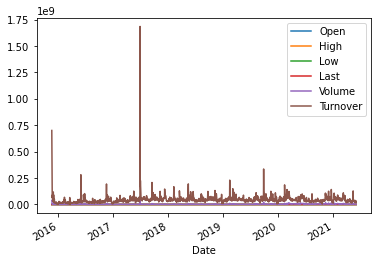

In [5]:
df.plot()

In [6]:
# df means dataframe
# last is the latest quoted stock price
prices = df['Last']

#this one is self explanatory
volumes = df['Volume']

In [7]:
# lets take a peek
prices.head()

Date
2015-11-20    18.35
2015-11-23    18.61
2015-11-24    18.80
2015-11-25    19.45
2015-11-26    19.43
Name: Last, dtype: float64

In [8]:
volumes.tail()

Date
2021-05-26    3447200.0
2021-05-27    3498258.0
2021-05-28    3001692.0
2021-05-31    1426676.0
2021-06-01    2689318.0
Name: Volume, dtype: float64

In [9]:
type(volumes)

pandas.core.series.Series

In [10]:

import matplotlib.pyplot as plt

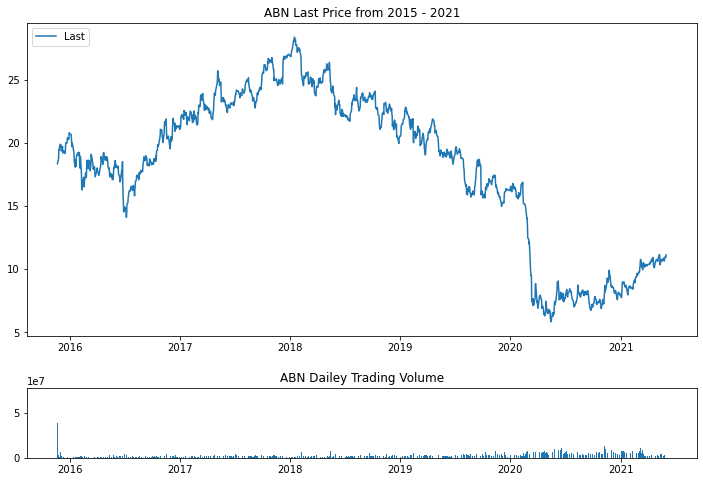

In [11]:
# the top plot consisting of daily closing prices
# first parameter (4,4) divides into 4x4 grid
# second parameter (0,0) anchors at top left
# rowspan means it will occupy 3/4 of the space horizontally (length)
# rowcol means it will occupy all of the space veritcally (width)
top = plt.subplot2grid((4, 4), (0, 0), rowspan=3, colspan=4)

top.plot(prices.index, prices, label='Last')
plt.title('ABN Last Price from 2015 - 2021')

#a loc of 2 means top right
plt.legend(loc=2)

#here we have it occupying 1/4 the length of the chart
bottom = plt.subplot2grid((4, 4), (3, 0), rowspan=1, colspan=4)
bottom.bar(volumes.index, volumes)
plt.title('ABN Dailey Trading Volume')
#gcf is get current figure
plt.gcf().set_size_inches(12, 8)

# hspace is the space in between the graphs
plt.subplots_adjust(hspace=0.75)


C:\Users\Halis Karic\Ana\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


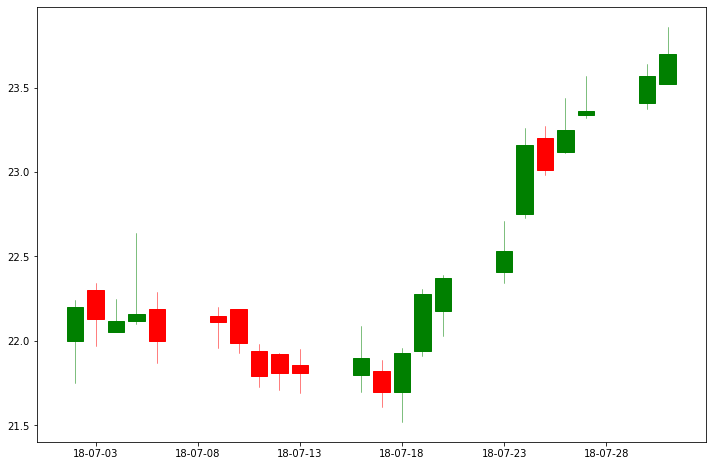

In [12]:
import quandl
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = QUANDL_API_KEY

#quandl.get you can specify the specific dates and range

df_subset = quandl.get('EURONEXT/ABN', 
                       start_date='2018-07-01', 
                       end_date='2018-07-31')

#prices retrieved are placed into a variable names df_dataset, the mdates.date2num converts the index vcalues containing
# date and values and places them in a column named date
                       
df_subset['Date'] = df_subset.index.map(mdates.date2num)
df_ohlc = df_subset[['Date','Open', 'High', 'Low', 'Last']]
                       
figure, ax = plt.subplots(figsize = (12,8))
formatter = mdates.DateFormatter('%y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax, 
                 df_ohlc.values, 
                 width=0.8,
                 colorup='green', 
                 colordown='red')
plt.show()

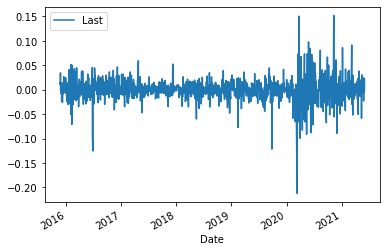

In [13]:
#plotting returns
#only the 4th column which is the last prices

df = quandl.get('EURONEXT/ABN.4')
daily_changes = df.pct_change(periods=1)
daily_changes.plot();

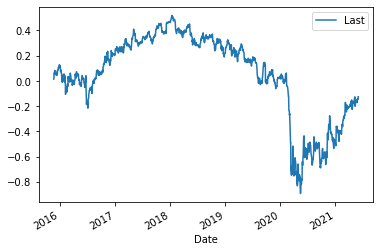

In [14]:
#plotting cumulative returns
df_cumsum = daily_changes.cumsum()
df_cumsum.plot();

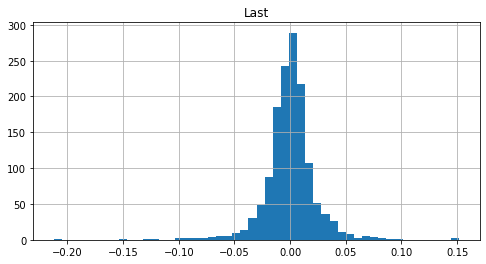

In [15]:
#plotting a histogram
daily_changes.hist(bins=50, figsize=(8, 4));

In [16]:
daily_changes.describe()

,Last
count,1408.000000
mean,-0.000089
std,0.022877
min,-0.212453
25%,-0.009574
50%,0.000283
75%,0.009749
max,0.152042


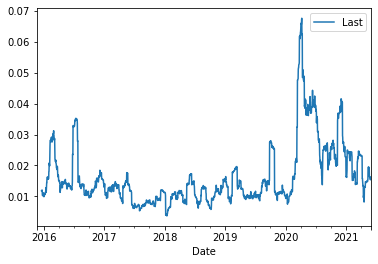

In [17]:
#plotting volatility aka sd
#df.asfreq() will re-index time series data 

df_filled = df.asfreq('D', method='ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window=30, min_periods=30).std()
df_std.plot();



NameError: name 'plot' is not defined

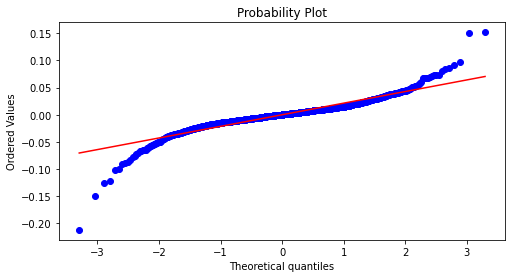

In [23]:
%matplotlib inline
import quandl
from scipy import stats
from scipy.stats import probplot

df = quandl.get('EURONEXT/ABN.4')
daily_changes = df.pct_change(periods=1).dropna()
figure = plt.figure(figsize=(8,4))
ax = figure.add_subplot(111)
stats.probplot(daily_changes['Last'], dist='norm', plot=ax)
plot.show;

#implies perfectly distributed data out side of quntile -2, +2 there begins to be negative skews at the tails

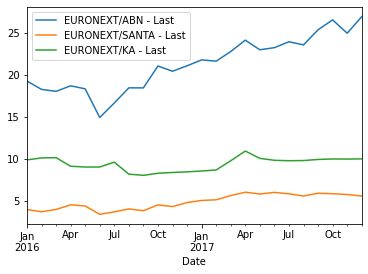

In [28]:
#multiple time series data
%matplotlib inline
import quandl

#quandl.ApiConfig.api_key = QUANDL_API_KEY

df = quandl.get (['EURONEXT/ABN.4',
                 'EURONEXT/SANTA.4',
                 'EURONEXT/KA.4'],
                collapse='monthly',
                start_date='2016-01-01',
                end_date='2017-12-31')
df.plot();

In [29]:
#correlation
df.pct_change().corr()

,EURONEXT/ABN - Last,EURONEXT/SANTA - Last,EURONEXT/KA - Last
EURONEXT/ABN - Last,1.000000,0.809824,0.096238
EURONEXT/SANTA - Last,0.809824,1.000000,0.058095
EURONEXT/KA - Last,0.096238,0.058095,1.000000


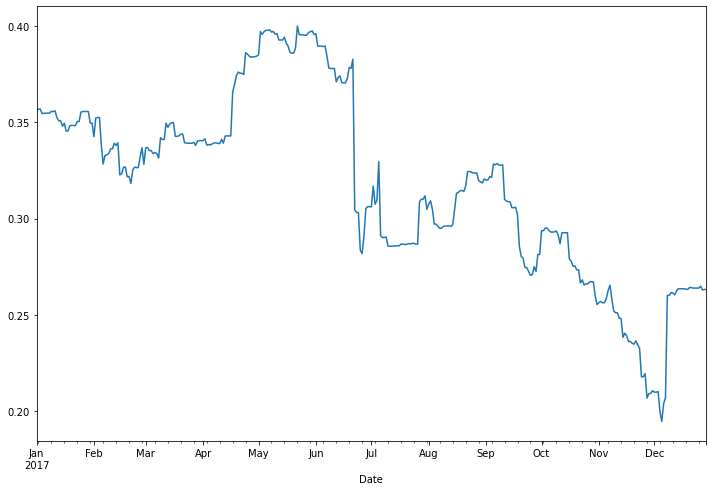

In [2]:
#plotting correlations
%matplotlib inline
import quandl
#quandl.ApiConfig.api_key = QUANDLE_API_KEY
df = quandl.get(['EURONEXT/ABN.4', 'EURONEXT/SANTA.4'],
               start_date='2016-01-01',
               end_date='2017-12-31')

df_filled = df.asfreq('D', method='ffill')
daily_changes = df_filled.pct_change()
abn_returns = daily_changes['EURONEXT/ABN - Last']
santa_returns = daily_changes['EURONEXT/SANTA - Last']
window = int(len(df_filled.index)/2)

df_corrs = abn_returns\
.rolling(window=window, min_periods=window)\
.corr(other=santa_returns).dropna()

df_corrs.plot(figsize=(12,8));


#df_filled variable contains DF with its index re-indexed on daily freq basis and missing values forward filled
#in preparation for the rolling() command 

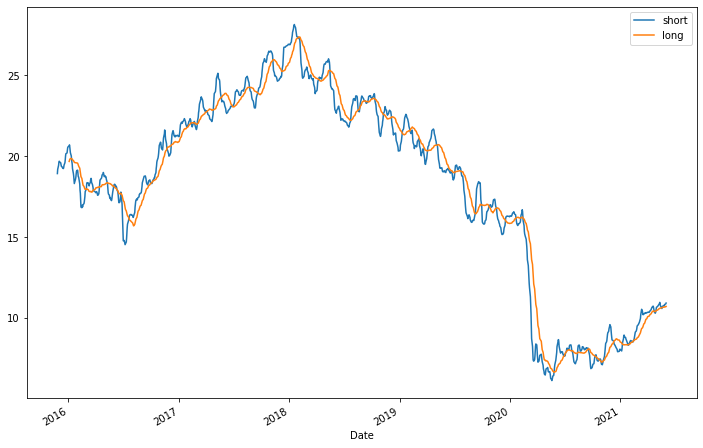

In [38]:
#simple MA

%matplotlib inline
import quandl
import pandas as pd

#quandl.ApiConfig.api_key = QUANDL_API_KEY

df = quandl.get('EURONEXT/ABN.4')

df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']

series_short = df_last.rolling(window=5, min_periods=5).mean()
series_long = df_last.rolling(window=30, min_periods=30).mean()

#min_periods paramter is supplied to exclude the first rows that do not have sufficient sample size
#df_sma new df that stores SMA computations
#12 by 8 graph

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long
df_sma.plot(figsize=(12,8));


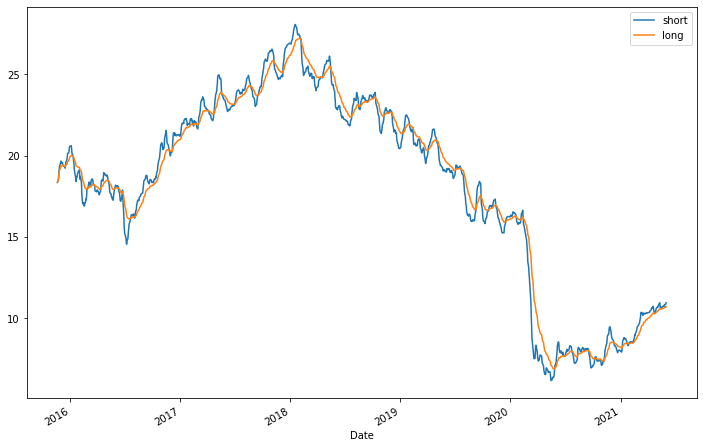

In [39]:
%matplotlib inline
import quandl
import pandas as pd

#quandl key

df = quandl.get('EURONEXT/ABN.4')

df_filled = df.asfreq('D', method='ffill')
df_last = df['Last']

series_short = df_last.ewm(span=5).mean()
series_long = df_last.ewm(span=30).mean()

df_sma = pd.DataFrame(columns=['short', 'long'])
df_sma['short'] = series_short
df_sma['long'] = series_long

df_sma.plot(figsize=(12, 8));


In [42]:
"""
Linear regression with SciPy

"""
from scipy import stats

stock_returns = [0.065, 0.0265, -0.0593, -0.001, 0.0346]
mkt_returns = [0.055, -0.09, -0.041, 0.045, 0.022]
beta, alpha, r_value, p_value, std_err = \
stats.linregress(stock_returns, mkt_returns)

print(beta, alpha)

#capm baby

0.5077431878770808 -0.008481900352462384


In [51]:
# capm suffers from limitations such as the use of a mean-variance framework and the fact that returns are captured by one 
#risk factor - the market risk factor. In a well-diversified portfolio, the unsystematic risk of various stocks cancels out
#and is essentially eliminated

#APT model 

#multivariate linear regression of factor models

"""
Least squares regression with statsmodels

"""
import numpy as np
import statsmodels.api as sm

#generate some sample data

num_periods = 9
all_values = np.array([np.random.random(8) \
                       for i in range(num_periods)])

#filter the data

y_values = all_values[:, 0]
x_values = all_values[:, 1:]

#first column values as Y
#all other values as X

x_values = sm.add_constant(x_values)

#include the intercept

results = sm.OLS(y_values, x_values).fit()

#regress and fit the model

print(results.summary())





                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                 -1.235
Method:                 Least Squares   F-statistic:                    0.3686
Date:                Wed, 01 Dec 2021   Prob (F-statistic):              0.856
Time:                        18:00:40   Log-Likelihood:                 8.1276
No. Observations:                   9   AIC:                           -0.2552
Df Residuals:                       1   BIC:                             1.323
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5277      0.809     -0.652      0.6

C:\Users\Halis Karic\Ana\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [52]:
print(results.params)

[-0.52773238  0.49596407 -0.43142302  0.59375625  0.62302918 -0.35226303
  0.7306907   0.07404518]


In [54]:
# In CAPM and ATP pricing theories we assumed linearity in the models and solved for the expected security prices.
#optimization focuses on min or max the problem of portfolio allocation
# example: max returns and min volatility

#example

#suppose we are interested in 2 securities X and Y
# we would like to figure out the actual number of units to invest 
#for every three units of the security X and two units of Y
#Constraints :

#for every 2 units of security X invested and 1 unit of security Y, the total volume must not exceed 100
#for every unit of security X and Y invested the the total volume must of exceed 80
#the total volume allowed to invest in X must not exceed 40
#short selling is not allowed

#Mathematically as: 
#f(x,y)=3x+2y

#subject to
#2x+y<100
#x+y<80
#x<40
#x>0, y>0


In [56]:
"""
A simple linear optimization problems with 2 variables

"""
import pulp

x = pulp.LpVariable('x', lowBound=0)
y = pulp.LpVariable('y', lowBound=0)

problem = pulp.LpProblem('A simple maximization objective',pulp.LpMaximize)
problem += 3*x + 2*y, 'the objective function'
problem += 2*x + y <= 100, '1st constraint'
problem += x + y <= 80, '2nd onstraint'
problem += x <= 40, '3rd constraint'
problem.solve()

print("Maximization Results:")
for variable in problem.variables():
    print(variable.name, '=', variable.varValue)
    

Maximization Results:
x = 20.0
y = 60.0


In [57]:
#Suppose we must go for 150 contracts in a particular over-the-counter exotic security from three dealers.

#Dealer X quoted $500 per contract + handling fees of $4000 
#Dealer Y quoted $450 per contract + handling fee of $2000
#Dealer Z charges $450 per contract + handling fee of $6000

# dealer X will sell at most 100 contracts
#Y -> 90
#Z -> 70

#minimum volume for any deal = 30

In [65]:
"""
An example of implementing an integer programming model with binary conditions

"""
import pulp

dealers = ['X', 'Y', 'Z']
variable_costs = {'X':500, 'Y': 350, 'Z': 450}
fixed_costs = {'X': 4000, 'Y': 2000, 'Z': 6000}

#Define pulp variables to solve 
quantities = pulp.LpVariable.dicts('quantity', 
                                   dealers,
                                   lowBound=0,
                                   cat=pulp.LpInteger)

is_orders = pulp.LpVariable.dicts('orders',
                                  dealers,
                                  cat=pulp.LpBinary)

In [72]:
"""
This is an example of implementing an IP model with binary variables the correct way.
"""
#Initialize the model with constraints
model = pulp.LpProblem('A cost minimization problem', pulp.LpMinimize)
model += sum([variable_costs[i]*quantities[i] + \
             fixed_costs[i]*is_orders[i] for i in dealers])\

, 'Minimize portfolio cost'
model += sum([quantities[i] for i in dealers]) == 150\
, 'Total contacts required'
model += is_orders['X']*30 <= quantities['X'] <= \
is_orders['X']*100, 'Boundary of total volume of X'
model += is_orders['Y']*30 <= quantities['Y'] <= \
is_orders['Y']*90, 'Boundary of total volume of Y'
model += is_orders['Z']*30 <= quantities['Z'] <= \
is_orders['Z']*70, 'Boundary of total volume of Z'
model.solve()

1

In [73]:
print('Minimization Results:')
for variable in model.variables():
    print(variable, '=', variable.varValue)
    
print('Total cost:', pulp.value(model.objective))

Minimization Results:
orders_X = 0.0
orders_Y = 1.0
orders_Z = 1.0
quantity_X = 0.0
quantity_Y = 90.0
quantity_Z = 60.0
Total cost: 66500.0


In [149]:
#supppose we would like to build a portfolio with 3 securities a,b,c
#must consist of 6 long units in security a, with every 2 units in security a, one of b and one of c the net position must 
#be 4 units long 
#with every one unit of security a, three of security b, and two of c the position must be 5 units

#framed mathematically
#2a+b+c=4
#a+3b+2c=5
#a=6

#OR

#2a+1b+1c=4
#1a+3b+2c=5
#1a+0b+0c=6

# linear equations Ax=B
#we can take the inverse to solve 
#x=A^-1(B)


In [148]:
"""
Linear algrebra with NumPy matrices

"""
import numpy as np

A = np.array([[2,1,1], [1,3,2], [1,0,0]])
B = np.array([4,5,6])

print(np.linalg.solve(A, B))

[  6.  15. -23.]


In [ ]:
import math

"""
Stores common attributes of stock options

"""
class StockOption(object):
    def _init_(
    self, s0, k, r=0.05, t=1, n=2, pu=0, pd=0
    
    div=0, sigma=0, is_put=False, is_am=False)
    
    """
    Initialize the stock option base class.
    Defaults to European call unless specified 
    
    :param s0: initial stock price
    :param k: strike price
    :param r: risk free rate
    :param t: time to maturity
    :param n: number of time steps
    :param pu: probability at up state
    :param pd: probability at down state
    :param div: Dividend yield
    :param is_put: True for a put option, False for a call option
    :param is_am: True for a american options, False for a european option
    """
    
    self.s0 = s0
    self.k = k
    self.r = r
    self.t = t
    self.n = max(1, n)
    self.STs = []
    
    """
    Optional parameters used by derived classes
    
    """
    self.pu, self.pd = pu, pd
    self.div = div
    self.sigma = sigma
    self.is_call = not is_put
    self.is_european = not is_am
    
@property
def dt(self):
    """single step, in years"""
    return self.T/float(self.N)

@property
def df(self):
    """the discount factor"""
    return math.exp(-(self.r-self.div)*self.dt)